# 1. Import Library

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset

In [4]:
# Load the uploaded dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estimasi/beratbadan.csv')

df

,Nama,Kalori/hari(X),Berat Badan(Y)
0,Adi,530,89
1,Rudi,300,48
2,Didi,358,56
3,Budi,510,72
4,Intan,302,54
5,Putu,300,42
6,parta,387,60
7,esti,527,85
8,ike,415,63
9,lia,512,74


# 3. Data Preprocessing

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nama            10 non-null     object
 1   Kalori/hari(X)  10 non-null     int64 
 2   Berat Badan(Y)  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
# Menggunakan kolom 'Nama' sebagai index
data = df.set_index('Nama')

In [7]:
# Rename columns for easier access
data.columns = ['Kalori_per_hari', 'berat_badan']

In [8]:
# Check for any missing values in the dataset
df.isnull().sum()

,0
Nama,0
Kalori/hari(X),0
Berat Badan(Y),0


# 4. Split Data menjadi Training test dan Testing test 70% - 30%

In [9]:
# Step 2: Split the data into training and testing sets
X = data[['Kalori_per_hari']]
y = data['berat_badan']

# Using a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 5. Model Linear Regression

In [10]:
# Step 3: Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)


# 6. Evaluasi Matriks

In [12]:
# Step 5: Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display model coefficients and evaluation metrics
a = model.intercept_  # Intercept
b = model.coef_[0]    # Slope

# Display the calculated metrics and model coefficients
a, b, mae, mse, rmse, r_squared, mape

(-3.555078901079426,
 0.16141081288569992,
 3.669809914694317,
 26.972298868287666,
 5.193486196023598,
 -0.8115723120491714,
 6.718968059091261)

In [13]:
print("hasil intercept adalah", "{:.2f}".format(a))
print("setiap peningkatan asupan kalori harian sebesar 1 satuan diasumsikan meningkatkan berat badan sekitar", "{:.3f}".format(b), "kg")
print("Rata-rata kesalahan absolut dalam prediksi berat badan adalah sekitar", "{:.2f}".format(mae), "kg")
print("Kuadrat rata-rata kesalahan adalah", "{:.2f}".format(mse))
print("Kesalahan dalam satuan yang sama dengan data asli", "{:.2f}".format(rmse), 'kg')
print("Nilai negatif menunjukkan bahwa model tidak cocok dengan data (fit yang buruk), mungkin karena outliers atau ukuran dataset yang kecil", "{:.2f}".format(r_squared))
print("Kesalahan rata-rata dalam bentuk persentase, yang tergolong akurat secara umum sekitar", "{:.2f}".format(mape)+'%')


hasil intercept adalah -3.56
setiap peningkatan asupan kalori harian sebesar 1 satuan diasumsikan meningkatkan berat badan sekitar 0.161 kg
Rata-rata kesalahan absolut dalam prediksi berat badan adalah sekitar 3.67 kg
Kuadrat rata-rata kesalahan adalah 26.97
Kesalahan dalam satuan yang sama dengan data asli 5.19 kg
Nilai negatif menunjukkan bahwa model tidak cocok dengan data (fit yang buruk), mungkin karena outliers atau ukuran dataset yang kecil -0.81
Kesalahan rata-rata dalam bentuk persentase, yang tergolong akurat secara umum sekitar 6.72%


# 7. Visualisasi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


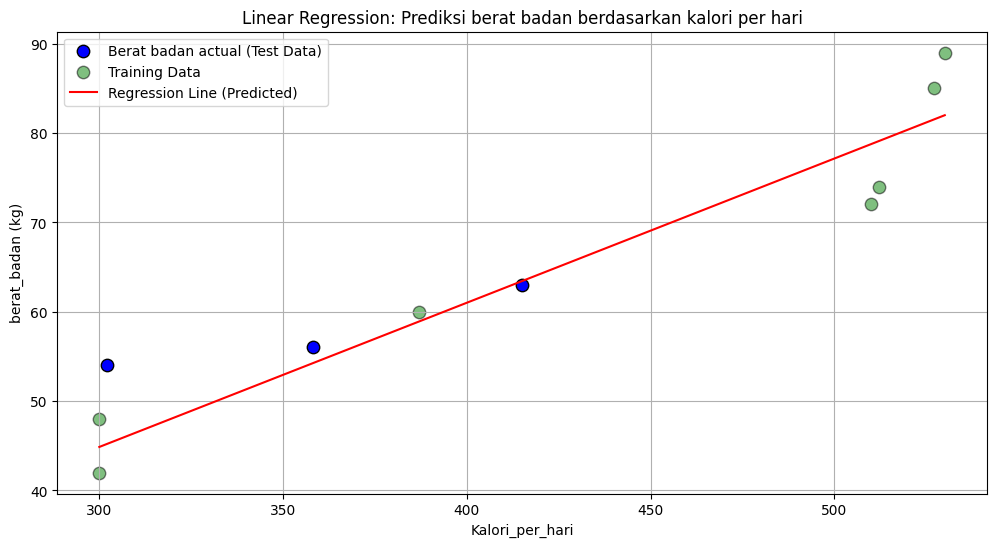

In [14]:
# Visualize the original data and the linear regression results

# Scatter plot of the original data points
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label="Berat badan actual (Test Data)", s=80, edgecolor='k')
plt.scatter(X_train, y_train, color='green', label="Training Data", alpha=0.5, s=80, edgecolor='k')

# Plotting the regression line based on the model
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generating X values for a smooth line
y_line = model.predict(X_line)  # Predicted Y values based on the regression line
plt.plot(X_line, y_line, color='red', label="Regression Line (Predicted)")

# Adding labels, title, and legend
plt.xlabel("Kalori_per_hari")
plt.ylabel("berat_badan (kg)")
plt.title("Linear Regression: Prediksi berat badan berdasarkan kalori per hari")
plt.legend()
plt.grid(True)
plt.show()
